In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image 

In [65]:
model = tf.keras.models.load_model('saved_model/model image and gas.h5')

In [66]:
# Image and Raw only
ripe_number = 1
unripe_number = 1

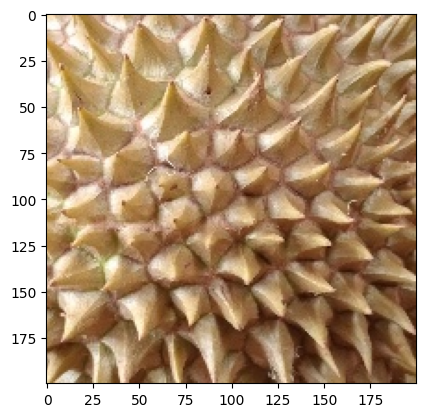

In [67]:
# Preprocess and Predict Raw data
test_raw_path = f"predictions/raw/ripe_{ripe_number}.jpg"
# test_raw_path = f"predictions/raw/unripe_{unripe_number}.jpg"
test_raw_path = image.load_img(test_raw_path)
plt.imshow(test_raw_path)

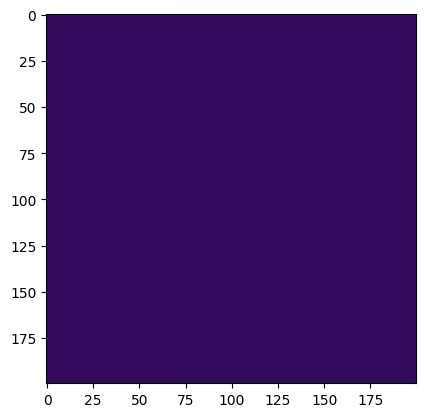

In [71]:
# Preprocess and Predict Gas data
test_gas_path = f"predictions/gas/ripe_{ripe_number}.jpg"
test_gas_path = f"predictions/gas/unripe_{unripe_number}.jpg"
img_gas= image.load_img(test_gas_path)
plt.imshow(img_gas)

In [72]:
X_raw = image.img_to_array(test_raw_path)
X_raw = np.expand_dims(X_raw, axis=0)
X_raw /= 255

X_gas = image.img_to_array(img_gas)
X_gas = np.expand_dims(X_gas, axis=0)
X_gas /= 255



In [73]:
predict = model.predict([X_raw, X_gas])
p = predict[0][0]
# p = '{:.10f}'.format(p)
p

1/1 [==============================] - 0s 48ms/step


1.0